## Handling Imbalanced Dataset

1. Up Sampling
2. Down Sampling

In [1]:
import numpy as np
import pandas as pd

In [2]:
# # Set the random seed for reproducibility
# np.random.seed(123)

In [12]:
# # Create a dataframe with two classes
# n_samples = 1000
# class_0_ratio = 0.9
# n_class_0 = int(n_samples * class_0_ratio)
# n_class_1 = n_samples - n_class_0

In [8]:
n_class_0 = 900
n_class_1 = 100

In [9]:
n_class_0,n_class_1

(900, 100)

In [13]:
## CREATE MY DATAFRAME WITH IMBALANCED DATASET
class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

In [14]:
class_0

,feature_1,feature_2,target
0,-0.367419,-0.016102,0
1,0.575273,0.747010,0
2,0.439351,-0.257842,0
3,-0.728152,0.561622,0
4,-0.888530,0.295353,0
...,...,...,...
895,0.719991,0.787335,0
896,-1.159531,0.732800,0
897,0.609591,-1.995079,0
898,-1.919582,-0.254572,0


In [15]:
class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

In [16]:
class_1

,feature_1,feature_2,target
0,0.723566,2.301225,1
1,2.054508,1.935051,1
2,1.364961,1.393597,1
3,1.509824,1.771339,1
4,1.566104,3.776112,1
...,...,...,...
95,2.300311,3.140850,1
96,2.777139,1.428622,1
97,2.589859,2.675585,1
98,0.013286,2.244925,1


In [17]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [18]:
df

,feature_1,feature_2,target
0,-0.367419,-0.016102,0
1,0.575273,0.747010,0
2,0.439351,-0.257842,0
3,-0.728152,0.561622,0
4,-0.888530,0.295353,0
...,...,...,...
995,2.300311,3.140850,1
996,2.777139,1.428622,1
997,2.589859,2.675585,1
998,0.013286,2.244925,1


In [19]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

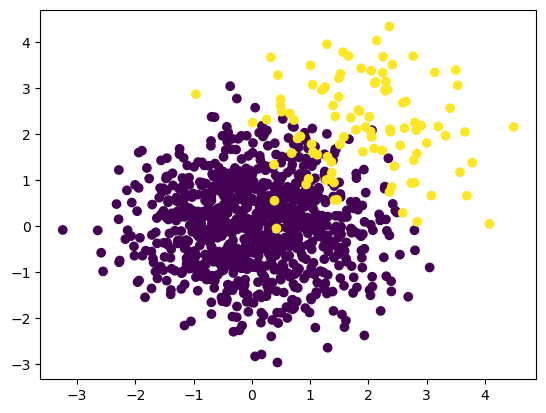

In [20]:
import matplotlib.pyplot as plt
plt.scatter(df['feature_1'],df['feature_2'],c=df['target'])

## Upsampling

In [21]:
## upsampling
df_minority = df[df['target']==1]
df_majority = df[df['target']==0]

In [22]:
df_minority

,feature_1,feature_2,target
900,0.723566,2.301225,1
901,2.054508,1.935051,1
902,1.364961,1.393597,1
903,1.509824,1.771339,1
904,1.566104,3.776112,1
...,...,...,...
995,2.300311,3.140850,1
996,2.777139,1.428622,1
997,2.589859,2.675585,1
998,0.013286,2.244925,1


In [23]:
from sklearn.utils import resample
df_minority_upsampled = resample(df_minority,replace=True, n_samples=len(df_majority), random_state=42)

In [24]:
df_minority_upsampled.shape

(900, 3)

In [25]:
df_minority_upsampled

,feature_1,feature_2,target
951,2.998884,1.803756,1
992,2.361990,0.739604,1
914,0.932880,0.904999,1
971,2.409614,3.507181,1
960,1.874774,3.425993,1
...,...,...,...
952,2.142778,4.026777,1
965,1.431038,2.383004,1
976,2.015005,2.370883,1
942,2.444941,1.297736,1


In [26]:
df_upsampled=pd.concat([df_majority,df_minority_upsampled])

In [27]:
df_upsampled['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64

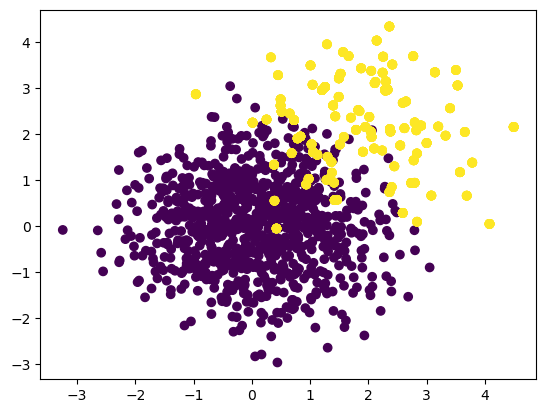

In [28]:
plt.scatter(df_upsampled['feature_1'],df_upsampled['feature_2'],c=df_upsampled['target'])

## Down Sampling

In [30]:
df

,feature_1,feature_2,target
0,-0.367419,-0.016102,0
1,0.575273,0.747010,0
2,0.439351,-0.257842,0
3,-0.728152,0.561622,0
4,-0.888530,0.295353,0
...,...,...,...
995,2.300311,3.140850,1
996,2.777139,1.428622,1
997,2.589859,2.675585,1
998,0.013286,2.244925,1


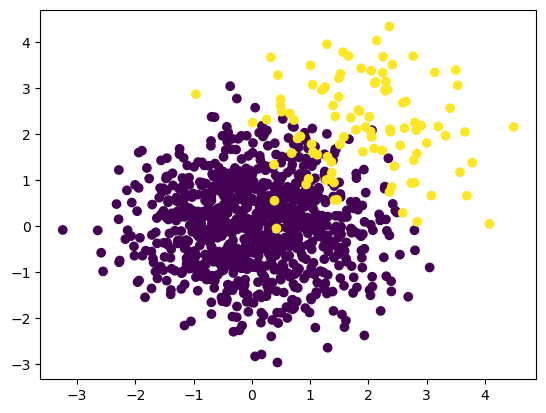

In [31]:
plt.scatter(df['feature_1'],df['feature_2'],c=df['target'])

In [32]:
## downsampling
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [33]:
df_majority_downsampled=resample(df_majority,replace=False, n_samples=len(df_minority), random_state=42 )

In [34]:
df_majority_downsampled.shape

(100, 3)

In [35]:
df_majority_downsampled=pd.concat([df_minority,df_majority_downsampled])

In [36]:
df_majority_downsampled['target'].value_counts()

target
1    100
0    100
Name: count, dtype: int64

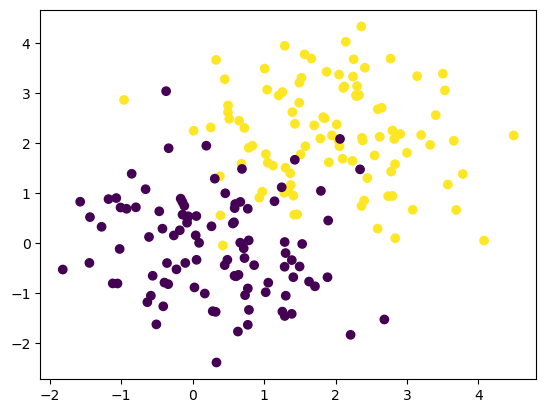

In [37]:
plt.scatter(df_majority_downsampled['feature_1'],df_majority_downsampled['feature_2'],c=df_majority_downsampled['target'])

## SMOTE(Synthetic Minority Oversampling Technique)
SMOTE (Synthetic Minority Over-sampling Technique) is a technique used in machine learning to address imbalanced datasets where the minority class has significantly fewer instances than the majority class. SMOTE involves generating synthetic instances of the minority class by interpolating between existing instances.

In [38]:
from imblearn.over_sampling import SMOTE

In [39]:
df

,feature_1,feature_2,target
0,-0.367419,-0.016102,0
1,0.575273,0.747010,0
2,0.439351,-0.257842,0
3,-0.728152,0.561622,0
4,-0.888530,0.295353,0
...,...,...,...
995,2.300311,3.140850,1
996,2.777139,1.428622,1
997,2.589859,2.675585,1
998,0.013286,2.244925,1


In [40]:
oversample = SMOTE()
X,y = oversample.fit_resample(df[['feature_1','feature_2']],df['target'])

In [41]:
X,y

(      feature_1  feature_2
 0     -0.367419  -0.016102
 1      0.575273   0.747010
 2      0.439351  -0.257842
 3     -0.728152   0.561622
 4     -0.888530   0.295353
 ...         ...        ...
 1795   0.417925   3.170726
 1796   1.343055   1.107864
 1797   2.168666   3.944669
 1798   1.900784   2.315337
 1799   0.858430   1.683191
 
 [1800 rows x 2 columns],
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 1795    1
 1796    1
 1797    1
 1798    1
 1799    1
 Name: target, Length: 1800, dtype: int64)

In [42]:
len(y[y==0])

900

In [43]:
len(y[y==1])

900

In [44]:
X = pd.DataFrame(X,columns=['feature_1','feature_2'])
y = pd.DataFrame(y,columns=['target'])
oversample_df = pd.concat([X,y],axis=1)

In [45]:
oversample_df

,feature_1,feature_2,target
0,-0.367419,-0.016102,0
1,0.575273,0.747010,0
2,0.439351,-0.257842,0
3,-0.728152,0.561622,0
4,-0.888530,0.295353,0
...,...,...,...
1795,0.417925,3.170726,1
1796,1.343055,1.107864,1
1797,2.168666,3.944669,1
1798,1.900784,2.315337,1


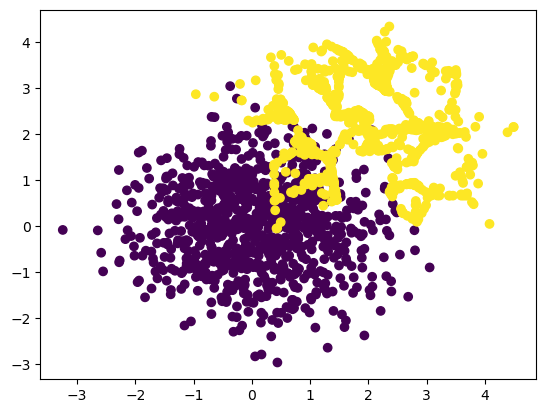

In [46]:
plt.scatter(oversample_df['feature_1'],oversample_df['feature_2'],c=oversample_df['target'])